In [1]:
import random
import matplotlib 
from matplotlib import pyplot as plt 
import numpy as np
import pylab
from pylab import *
import copy
from copy import deepcopy

#N PAREKATZE-EREDUA: "lotu" funtzioak l_3 ertzean ezartzen dugun atazaren arabera lortzen den
#kostu akumulatua zein den bueltatzen du. Horretaz gain, grafiko desberdinak marrazten ditu: alde batetik, 
#ataza desberdinak ezarriz lortu ditugun kostu akumulatuek izan duten eboluzioa denboran zehar eta bestetik, 
#amaieran lortu diren kostu akumulatuen batezbestekoak ataza desberdinetarako.

#POLITIKA FUNTZIOA
def politika(x,t,iritsierak):
    # 1go: l_1-eko parektaze guztiak egitea:
    parekatzeak=min(x[0],x[2]); #d_1-en eta s_1 nodoetan parekatu daitezkeen elementu kopurua kalkulatu
    x=list(np.array(x)-np.array([parekatzeak,0,parekatzeak,0]));#Parekatzeen ostean nodo bakoitzean zenbat elementu dauden
    # 2.: l_2-ko parekatze guztiak egitea:
    parekatzeak=min(x[1],x[3]); #d_2 eta s_2 nodoetan parekatu daitezkeen elementu kopurua kaltulatu
    x=list(np.array(x)-np.array([0,parekatzeak,0,parekatzeak]));#Parekatzeen ostean nodo bakoitzean zenbat elementu dauden
    # 3.: Ikusi ea l_3-koak parekatzea komenigarria den
    if x[0] and x[3] >= t: #Ezarri dugun ataza baino elementu gehiago badaude d_1 eta s_2 nodoetan:
        parekatzeak=min(x[0],x[3])-t; #Parekatu ahal diren guztiak d_1 eta s_2 nodetan t elementu geratu arte.
        x=list(np.array(x)-np.array([parekatzeak,0,0,parekatzeak]));#Parekatzeen ostean nodo bakoitzean zenbat elementu dauden
    return x #Parekatze guztiak egin ostean nodo bakoitzean geratzen den elementu kopurua bueltatzen du bektore batean.



#OINARRIZKO FUNTZIOA
#x:Hasieran nodo bakoitzean dagoen elementu kopurua. Bektore bat da.
#t:Ezarri dugun ataza. Zenbaki bat da.
#iritsierak:Random zenbakiez osatutako matrize bat da. 
def lotu(x,t,iritsierak):
    baturak=[];
    x_guztiak=[];
    p=[0.7,0.3,0.6,0.4];# Elementuek nodo bakoitzera iristeko duten probabilitatea
    a=len(iritsierak); #Zenbat iritsiera egongo diren.
    for i in range (0,a+1):#Iritsiera bakoitzerako:
        x=politika(x,t,iritsierak)# Politika funtzioak bueltatu digun azken x bektorea gordetzen du
        x_guztiak.append(deepcopy(x))# Politika funtzioak bueltazen digun x bakoitza gordetzen du matrizen baten.
        if i<a:
            # Une bakoitzean iristen den elementua zein nodotara joango den erabaki
            #Eskari nodoak:
            if iritsierak[i][0]>p[0]:#i. random zenbakia d_1 nodora elementuek iristeko duten probabilitatea baino handiagoa (alpha1) bada:
                x[1]=x[1]+1; #Orduan, elementu bat gehituko da d_2 nodoan.
            else:
                x[0]=x[0]+1;# Bestela, (alpha1 baino txikiagoa bada), elementua d_1 nodoan gehituko da.
            #Hornidura nodoak:
            if iritsierak[i][1]>p[2]:#i. random zenbakia elementuek s_1 nodora iristeko duten probabilitatea (beta1) baino handiagoa bada:
                x[3]=x[3]+1; # Orduan, s_2 nodoan gehituko da elementua.
            else:
                x[2]=x[2]+1;#Bestela, s_1 nodorar iritsiko da elementua.
    else:
        # Grafikoa marraztuko dugu
        for i in range(0,len(x_guztiak)):
            baturak.append(sum(x_guztiak[i]))#n denbora une bakoitzeko elementu kopurua.          
        # kostu akumulatua honela kalkulatzen da: kostua+(delta**i * baturak[i])
        delta=0.999;
        kostua=0;#Hasieran 0
        kostu_lista=[];
        for i in range (0,a+1):
            kostua=kostua+(delta**i * baturak[i])
            kostu_lista.append(kostua) #Kostu akumulatuen lista
        return kostu_lista

Text(0, 0.5, 'kostua')

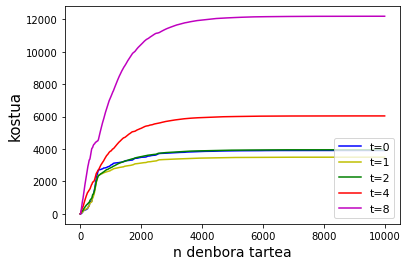

In [3]:
#LEHENENGO GRAFIKOA: ataza desberdinak ezarriz lortu ditugun kostu akumulatuek izan duten eboluzioa denboran zehar
x=[0,0,0,0] #Hasierako egoera
n=10000 #Zenbat denbora une egongo diren edo zenbat iritsiera egongo diren.
iritsierak = np.random.random((n,2))#Random matrizea
##Marraztu
plot(lotu(x,0,iritsierak),'b',lotu(x,1,iritsierak),'y',lotu(x,2,iritsierak),'g',lotu(x,4,iritsierak),'r',lotu(x,8,iritsierak),'m')#,lotu(x,20,iritsierak),'c',lotu(x,80,iritsierak),'k')#,lotu(x,16,iritsierak),'.',lotu(x,17,iritsierak),'.')
legend(('t=0', 't=1', 't=2','t=4','t=8','t=20','t=80'),prop = {'size':11}, loc='lower right')
plt.xlabel('n denbora tartea', fontsize=14)
plt.ylabel('kostua', fontsize=15)



3461.470811847971 2920.5819552275816 3234.426566049248 4087.890655003231 5272.941052653228 6662.5693144980505 8179.677170987261


Text(0, 0.5, 'kostua')

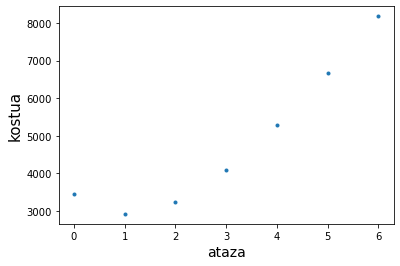

In [4]:
#2.GRAFIKOA: amaieran lortu diren kostu akumulatuen batezbestekoak ataza desberdinetarako.
x=[0,0,0,0] #Hasierako egoera
n=20000 #Iritsiera kopurua
lista_0=[];
lista_1=[];
lista_2=[];
lista_4=[];
lista_7=[];
lista_10=[];
lista_15=[];
#lista_20=[];

for i in range(0,50):
    iritsierak = np.random.random((n,4))
    lista_0.append(lotu(x,0,iritsierak))
    lista_1.append(lotu(x,1,iritsierak))
    lista_2.append(lotu(x,2,iritsierak))
    lista_4.append(lotu(x,3,iritsierak))
    lista_7.append(lotu(x,4,iritsierak))
    lista_10.append(lotu(x,5,iritsierak))
    lista_15.append(lotu(x,6,iritsierak))
    #lista_20.append(lotu(x,12,iritsierak))

#Ataza bakoitzarekin lortzen den kostu akumulatuen batezbestekoa bueltatzen du
print(mean(lista_0),mean(lista_1),mean(lista_2),mean(lista_4),mean(lista_7),mean(lista_10),mean(lista_15))#,mean(lista_20))   

#Marraztu
x=[mean(lista_0),mean(lista_1),mean(lista_2),mean(lista_4),mean(lista_7),mean(lista_10),mean(lista_15)]#,mean(lista_20)]
t=[0,1,2,3,4,5,6]#,12];
plot(t,x,'.')
plt.xlabel('ataza', fontsize=14)
plt.ylabel('kostua', fontsize=15)